# Занятие 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Непрерывные случайные величины

### Нормальное распределение

In [2]:
mu = 1
sigma = 4

norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерировать 10 значений 
norm_rv.rvs(size=10)

array([ 7.85784160e-02, -5.64274573e+00,  7.96078531e+00, -1.83027073e+00,
        8.39272621e-01, -2.32493915e-01,  9.45087531e-03,  1.23147531e+01,
       -4.33168682e-01,  8.32061518e+00])

In [3]:
# loc задаёт сдвиг (мат ожидание), scale - масштаб (среднеквадратичное отклонение), size - размер выборки

In [4]:
# вернём значение функции распределения нормальной случайной величины в точке
norm_rv.cdf(2) # вероятность того, что случайная величина будет меньше либо равна переданного значения

0.5987063256829237

[]

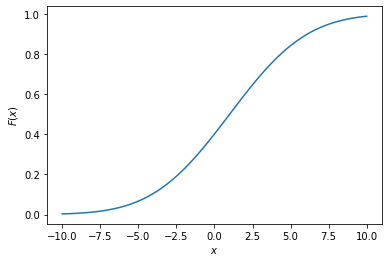

In [5]:
# построим график функции распределения
x = np.linspace(-10,10,100)
cdf = norm_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

In [6]:
# возьмём теперь значение функции плотности вероятности в точке
norm_rv.pdf(2)

0.09666702920071232

[]

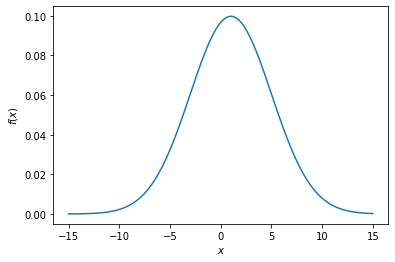

In [7]:
# построим плотность вероятности
x = np.linspace(-15,15,100)
pdf = norm_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

### Равномерное распределение на отрезке

In [8]:
a = 1
b = 4

uniform_rv = sts.uniform(a, b-a) # левая граница, и размер отрезка

uniform_rv.rvs(10)

array([1.17738381, 2.68624811, 3.74089052, 3.14100488, 2.74019351,
       2.20258781, 2.18175149, 3.7710299 , 3.21948283, 1.65524512])

[]

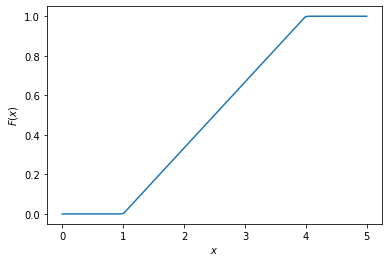

In [9]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

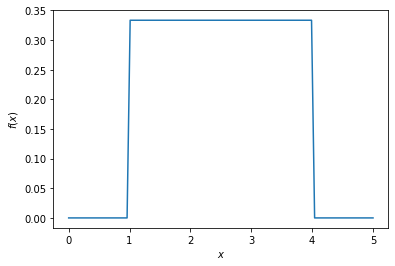

In [10]:
x = np.linspace(0,5,100)
pdf = uniform_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

## Дискретные случайные величины

### Распределение Бернулли

In [11]:
bernoulli_rv = sts.bernoulli(0.7) # задаётся один параметр -- вероятность успеха

bernoulli_rv.rvs(10)

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

### Биномиальное распределение
Кол-во успехов в серии n независимых испытаний бернулли

In [12]:
binomial_rv = sts.binom(20, 0.4) # 20 испытаний с вероятностью успеха 0.4

binomial_rv.rvs(10)

array([ 6,  7,  8,  4,  9, 10,  8,  8, 12,  8])

[]

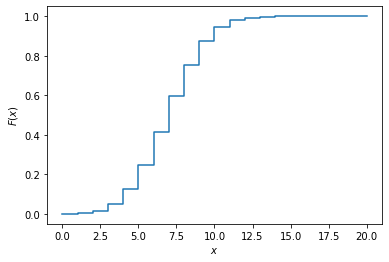

In [13]:
# построим функцию распределения
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x) # вернёт массив из значений функции распределения
plt.step(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

Функция вероятности pmf для дискретных случайных величин заменяет функцию плотности pdf

[]

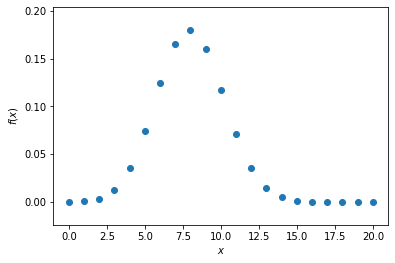

In [14]:
x = np.linspace(0,20,21)
pdf = binomial_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Посмотрим как ведут себя биномиально распределенные величины при разных значениях параметров

[]

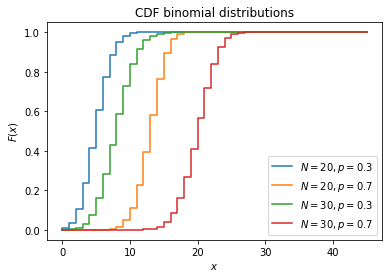

In [15]:
x = np.linspace(0,45,46)
for N in [20,30]:
  for p in [0.3, 0.7]:
    rv = sts.binom(N, p)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("CDF binomial distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

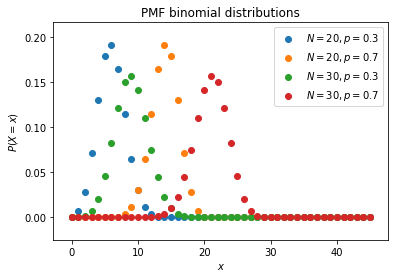

In [16]:
x = np.linspace(0,45,46)
for N in [20,30]:
  for p in [0.3, 0.7]:
    rv = sts.binom(N, p)
    pmf = rv.pmf(x)
    plt.scatter(x, pmf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("PMF binomial distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

### Распределение Пуассона

In [17]:
poisson_rv = sts.poisson(5) # интенсивность 5
poisson_rv.rvs(10)

array([6, 4, 2, 7, 5, 6, 6, 3, 2, 3])

[]

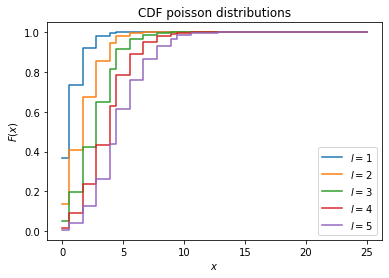

In [18]:
x = np.linspace(0,25,46)
for l in [1,2,3,4,5]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$l=%s$" % l)

plt.legend()
plt.title("CDF poisson distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

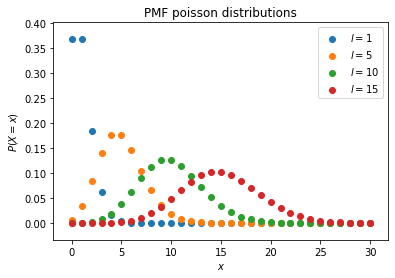

In [19]:
x = np.linspace(0,30,31)
for l in [1,5,10,15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.scatter(x, pmf, label="$l=%s$" % l)

plt.legend()
plt.title("PMF poisson distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

### Можно задать своё дискретное распределение
Для этого нужно задать множество значений и соответсвующих вероятностей

In [20]:
elements = np.array([1,5,12])
probabilities = [0.05, 0.6, 0.35]

np.random.choice(elements, 10, p=probabilities)

array([12,  5, 12,  1,  5,  5, 12,  5,  1,  5])

список доступных распределений https://docs.scipy.org/doc/scipy/reference/stats.html